In [1]:
import pandas as pd

In [2]:
# Load the Dataset
data = pd.read_csv('Weather.csv')

In [3]:
# Display the First Few Rows of the Dataset to understand its Structure
print(data.head())

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


## Correlation Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Compute the Correlation Matrix
corr_matrix = data.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_644\3283025024.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


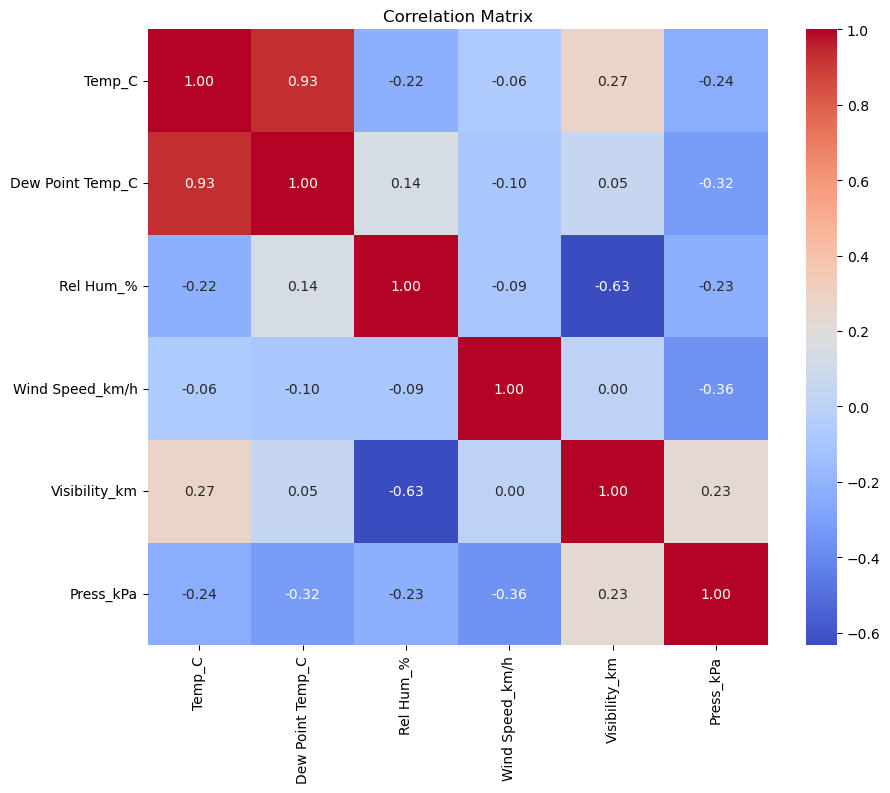

In [6]:
# Plot the Heat Map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

1. The correlation matrix is computed using pandas and visualized using seaborn and matplotlib.
2. A heatmap is generated to show the correlation between different weather parameters.

## Regression Analysis

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [8]:
# Define the Dependent (Target) Variable and Independent (Predictor) Variables
X = data[['Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]
y = data['Temp_C']

In [9]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Create and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict the Values for the Test Set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the Model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X_test, y_test))

Coefficients: [ 1.05345217 -0.24887263 -0.00473049 -0.00369912 -0.08511338]
Intercept: 31.658758762955344
R^2 Score: 0.9946166983921227


In [13]:
# Detailed Analysis Using Statsmodels
X_sm = sm.add_constant(X)  # Adding a Constant Column for the Intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Temp_C   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.589e+05
Date:                Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:00:58   Log-Likelihood:                -10672.
No. Observations:                8784   AIC:                         2.136e+04
Df Residuals:                    8778   BIC:                         2.140e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.1765      1.277  

1. The independent variables (Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa) and the dependent variable (Temp_C) are defined.
2. The dataset is split into training and testing sets.
3. A linear regression model is created and trained using sklearn.
4. The model's coefficients, intercept, and R² score are printed to evaluate its performance.
5. Detailed regression results are obtained using statsmodels for further insights.